In [58]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style = "darkgrid")

pd.set_option('display.max_colwidth', 100)  # Limit column width for better readability
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

file_path1 = (r'C:\Users\padhee.3\Downloads\Take Home Project\dict_data.json')

# Open the JSON file with the specified encoding
with open(file_path1, 'r', encoding='ISO-8859-1') as file:
    data = json.load(file)

# Display all key-value pairs
for key, value in data.items():
    print(f"Key: {key}, Value: {value}")

Key: introduction, Value: The challenge is to build a model that predicts at application time whether an applicant will become bad loan or not. The data consists of a set of variables that describe the requested loan and the applicant's credit attributes (annual income, debt-to-income ratio, number of credit inquiries in the last 6 months, etc.). These data are based on actual real-life loans obtained publicly with some modifications. We have split the data into two separate datasets, one for training the model and the other for validating it. We also provide a data dictionary, which contains brief descriptions of the meaning of each variable. Note: Not all of the variables are suitable for constructing the model. You will have to do some variable inspection and exploratory data analysis to determine which ones to use.
Key: task, Value: Use your own model to generte prediction for bad_flag as 0 or 1 in the testing dataset
Key: dictionary, Value: {'annual_inc': 'The annual income provid

In [59]:

# Access the "introduction" and "task" keys
print("\nIntroduction:")
print(data["introduction"])

print("\nTask:")
print(data["task"])


Introduction:
The challenge is to build a model that predicts at application time whether an applicant will become bad loan or not. The data consists of a set of variables that describe the requested loan and the applicant's credit attributes (annual income, debt-to-income ratio, number of credit inquiries in the last 6 months, etc.). These data are based on actual real-life loans obtained publicly with some modifications. We have split the data into two separate datasets, one for training the model and the other for validating it. We also provide a data dictionary, which contains brief descriptions of the meaning of each variable. Note: Not all of the variables are suitable for constructing the model. You will have to do some variable inspection and exploratory data analysis to determine which ones to use.

Task:
Use your own model to generte prediction for bad_flag as 0 or 1 in the testing dataset


In [60]:
# Extract dictionary content for the data dictionary section
dictionary_data = data["dictionary"]

# Convert dictionary data into a pandas DataFrame
df_dict = pd.DataFrame(list(dictionary_data.items()), columns=["Variable", "Description"])

# Display the DataFrame
df_dict

,Variable,Description
0,annual_inc,The annual income provided by the borrower during application.
1,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.
2,desc,Loan description provided by the borrower
3,dti,A ratio calculated using the borrowers total monthly debt payments on the total debt obligation...
4,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one yea...
5,home_ownership,"The home ownership status provided by the borrower during registration. Our values are: RENT, OW..."
6,id,A unique assigned ID for the loan listing.
7,inq_last_6mths,The number of inquiries by creditors during the past 6 months.
8,int_rate,Interest Rate on the loan
9,loan_amnt,The listed amount of the loan applied for by the borrower.


In [61]:
# File path to the dataset
file_path = (r'C:\Users\padhee.3\Downloads\Take Home Project\training_loan_data.csv')

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows
df.head(2)

C:\Users\padhee.3\AppData\Local\Temp\ipykernel_20900\1902483098.py:5: DtypeWarning: Columns (0,1,2,7,10,11,12,13,14,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Data derived from a public source,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
1,10000001,11983056,7550,36 months,16.24%,3 years,RENT,28000,NaN,debt_consolidation,100,96,8.4,0,17,72%,4000,NaN,3828.953801,5759,1,99,0


In [62]:
# Load the dataset, skipping the first row and treating the second row as the header
df = pd.read_csv(file_path, skiprows=1)

# Display the first few rows
df.head(2)

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056.0,7550,36 months,16.24%,3 years,RENT,28000.0,NaN,debt_consolidation,100.0,96.0,8.40,0.0,17.0,72%,4000.0,NaN,3828.953801,5759.0,1,99,0.0
1,10000002,12002921.0,27050,36 months,10.99%,10+ years,OWN,55000.0,Borrower added on 12/31/13 > Combining high interest credit cards to lower interest rate.<br>,debt_consolidation,25.0,53.9,22.87,0.0,8.0,61.20%,35700.0,NaN,34359.940730,114834.0,1,353,0.0


In [63]:
# Basic information about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199121 entries, 0 to 199120
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           199121 non-null  int64  
 1   member_id                    189457 non-null  float64
 2   loan_amnt                    199121 non-null  int64  
 3   term                         189457 non-null  object 
 4   int_rate                     189457 non-null  object 
 5   emp_length                   181531 non-null  object 
 6   home_ownership               189457 non-null  object 
 7   annual_inc                   189457 non-null  float64
 8   desc                         82004 non-null   object 
 9   purpose                      189457 non-null  object 
 10  percent_bc_gt_75             180419 non-null  float64
 11  bc_util                      180333 non-null  float64
 12  dti                          189457 non-null

In [64]:
numerical_df = df.select_dtypes(include=['number'])
# Summary statistics for numerical features
print("\nDescriptive Statistics (Numerical Features):")
df.describe()


Descriptive Statistics (Numerical Features):


,id,member_id,loan_amnt,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
count,1.991210e+05,1.894570e+05,199121.000000,1.894570e+05,180419.000000,180333.000000,189457.000000,189457.000000,161472.000000,181962.000000,32749.000000,181962.000000,1.617160e+05,199121.0,199121.000000,189457.000000
mean,1.009857e+07,5.929626e+06,14071.947334,7.224330e+04,53.575807,66.840867,17.061084,0.803549,6.993634,20239.424699,41.780054,20238.384308,1.373215e+05,1.0,183.967954,0.069293
std,5.704397e+04,3.339822e+06,8067.076636,5.180483e+04,34.153946,26.111490,7.596941,1.032936,5.879707,18879.795379,20.984599,18941.591779,1.507358e+05,0.0,104.858324,0.253952
min,1.000000e+07,1.515360e+05,1000.000000,4.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.0,14.000000,0.000000
25%,1.004958e+07,2.308792e+06,8000.000000,4.500000e+04,25.000000,49.500000,11.340000,0.000000,2.000000,7800.000000,25.000000,7834.720066,2.746575e+04,1.0,105.000000,0.000000
50%,1.009823e+07,6.060627e+06,12000.000000,6.200000e+04,50.000000,72.200000,16.780000,0.000000,6.000000,14700.000000,41.000000,14637.479485,8.076050e+04,1.0,157.000000,0.000000
75%,1.014801e+07,8.727745e+06,19600.000000,8.700000e+04,80.000000,89.000000,22.580000,1.000000,11.000000,26500.000000,58.000000,26397.825272,2.082122e+05,1.0,256.000000,0.000000
max,1.019779e+07,1.209899e+07,35000.000000,7.141778e+06,100.000000,339.600000,34.990000,8.000000,24.000000,522210.000000,165.000000,520643.298200,8.000078e+06,1.0,456.000000,1.000000


In [65]:
print(numerical_df.columns)

Index(['id', 'member_id', 'loan_amnt', 'annual_inc', 'percent_bc_gt_75',
       'bc_util', 'dti', 'inq_last_6mths', 'mths_since_recent_inq',
       'total_bc_limit', 'mths_since_last_major_derog', 'tot_hi_cred_lim',
       'tot_cur_bal', 'application_approved_flag', 'internal_score',
       'bad_flag'],
      dtype='object')


In [66]:
df["term"].value_counts()

term
36 months    144800
60 months     44657
Name: count, dtype: int64

In [67]:

# Clean 'years' column: Remove "years" and retain numbers
if 'emp_length' in df.columns:  # Replace 'years' with the actual column name
    df['emp_length'] = df['emp_length'].str.extract(r'(\d+)').astype(float)

# Clean percentage columns: Remove '%' and convert to decimal
percentage_columns = ['int_rate', 'revol_util']  # Replace with actual percentage column names
for col in percentage_columns:
    if col in df.columns:
        df[col] = df[col].str.replace('%', '', regex=True).astype(float) / 100

# Display cleaned dataset
print("Cleaned Columns:")
df.head(2)

Cleaned Columns:


,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056.0,7550,36 months,0.1624,3.0,RENT,28000.0,NaN,debt_consolidation,100.0,96.0,8.40,0.0,17.0,0.720,4000.0,NaN,3828.953801,5759.0,1,99,0.0
1,10000002,12002921.0,27050,36 months,0.1099,10.0,OWN,55000.0,Borrower added on 12/31/13 > Combining high interest credit cards to lower interest rate.<br>,debt_consolidation,25.0,53.9,22.87,0.0,8.0,0.612,35700.0,NaN,34359.940730,114834.0,1,353,0.0


In [68]:
print(f"\nDataset Shape: {df.shape}")


Dataset Shape: (199121, 23)


In [69]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                                  0
member_id                        9664
loan_amnt                           0
term                             9664
int_rate                         9664
emp_length                      17590
home_ownership                   9664
annual_inc                       9664
desc                           117117
purpose                          9664
percent_bc_gt_75                18702
bc_util                         18788
dti                              9664
inq_last_6mths                   9664
mths_since_recent_inq           37649
revol_util                       9791
total_bc_limit                  17159
mths_since_last_major_derog    166372
tot_hi_cred_lim                 17159
tot_cur_bal                     37405
application_approved_flag           0
internal_score                      0
bad_flag                         9664
dtype: int64


In [70]:
# Filter rows where 'member_id' is missing
missing_member_id = df[df['member_id'].isna()]
missing_member_id.head()

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
188123,10188124,NaN,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,196,NaN
188124,10188125,NaN,9600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,126,NaN
188125,10188126,NaN,8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,105,NaN
188126,10188127,NaN,11000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,144,NaN
188127,10188128,NaN,8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,105,NaN


In [71]:
 # Count rows where 'member_id' is NaN and 'bad_flag' is also NaN
count_missing = df[df['member_id'].isna() & df['bad_flag'].isna()].shape[0]

# Print the result
print(f"Number of Rows where 'member_id' is NaN and 'bad_flag' is also NaN: {count_missing}")

Number of Rows where 'member_id' is NaN and 'bad_flag' is also NaN: 9664


In [72]:
# Create a copy of the DataFrame and delete rows where both 'member_id' and 'bad_flag' are NaN
df_1 = df.dropna(subset=['member_id', 'bad_flag'], how='all')

# Print the modified DataFrame
print("Modified DataFrame (after deletion):")
df_1.head(2)

Modified DataFrame (after deletion):


,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056.0,7550,36 months,0.1624,3.0,RENT,28000.0,NaN,debt_consolidation,100.0,96.0,8.40,0.0,17.0,0.720,4000.0,NaN,3828.953801,5759.0,1,99,0.0
1,10000002,12002921.0,27050,36 months,0.1099,10.0,OWN,55000.0,Borrower added on 12/31/13 > Combining high interest credit cards to lower interest rate.<br>,debt_consolidation,25.0,53.9,22.87,0.0,8.0,0.612,35700.0,NaN,34359.940730,114834.0,1,353,0.0


In [73]:
print(f"\nDataset Shape: {df_1.shape}")


Dataset Shape: (189457, 23)


In [74]:
df_2 = df_1.drop(columns=['desc','member_id']) 
# Deleting the desc column as it has high missing values and for this code, I am not building a multimodal model.
# Deleting member id as it seems redundant for now

In [75]:
# Step 1: Separate categorical and numerical columns
categorical_columns = ['home_ownership', 'purpose', 'term']  # Replace with your actual categorical column names
numerical_columns = [col for col in df_2.columns if col not in categorical_columns and col != 'bad_flag']

In [76]:
# Print unique categories
categories = df_2['home_ownership'].unique()
print("Categories in 'home_ownership':", categories)

categories = df_2['purpose'].unique()
print("Categories in 'purpose':", categories)

categories = df_2['term'].unique()
print("Categories in 'term':", categories)

Categories in 'home_ownership': ['RENT' 'OWN' 'MORTGAGE' 'NONE' 'OTHER']
Categories in 'purpose': ['debt_consolidation' 'home_improvement' 'credit_card' 'other'
 'major_purchase' 'small_business' 'house' 'moving' 'medical' 'car'
 'vacation' 'renewable_energy' 'wedding']
Categories in 'term': [' 36 months' ' 60 months']


In [77]:
df_2["bad_flag"].value_counts()

bad_flag
0.0    176329
1.0     13128
Name: count, dtype: int64

In [78]:
print(df_2.columns)

Index(['id', 'loan_amnt', 'term', 'int_rate', 'emp_length', 'home_ownership',
       'annual_inc', 'purpose', 'percent_bc_gt_75', 'bc_util', 'dti',
       'inq_last_6mths', 'mths_since_recent_inq', 'revol_util',
       'total_bc_limit', 'mths_since_last_major_derog', 'tot_hi_cred_lim',
       'tot_cur_bal', 'application_approved_flag', 'internal_score',
       'bad_flag'],
      dtype='object')


In [79]:
# Check for missing values again
print("\nMissing Values:")
print(df_2.isnull().sum())


Missing Values:
id                                  0
loan_amnt                           0
term                                0
int_rate                            0
emp_length                       7926
home_ownership                      0
annual_inc                          0
purpose                             0
percent_bc_gt_75                 9038
bc_util                          9124
dti                                 0
inq_last_6mths                      0
mths_since_recent_inq           27985
revol_util                        127
total_bc_limit                   7495
mths_since_last_major_derog    156708
tot_hi_cred_lim                  7495
tot_cur_bal                     27741
application_approved_flag           0
internal_score                      0
bad_flag                            0
dtype: int64


In [80]:

outliers_count = {}
# Loop through each numerical column
for column in df_2.select_dtypes(include=['float64', 'int64']).columns:
    # Calculate the mean and standard deviation for the column
    mean = df_2[column].mean()
    std = df_2[column].std()

    # Calculate the Z-score for each value in the column
    z_scores = (df_2[column] - mean) / std

    # Identify outliers: Z-scores greater than 3 or less than -3
    outliers = df_2[(np.abs(z_scores) > 3)]

    # Store the count of outliers in the dictionary
    outliers_count[column] = outliers.shape[0]

# Display the number of outliers for each numerical column
for column, count in outliers_count.items():
    print(f"Number of outliers for column '{column}': {count}")

Number of outliers for column 'id': 0
Number of outliers for column 'loan_amnt': 0
Number of outliers for column 'int_rate': 0
Number of outliers for column 'emp_length': 0
Number of outliers for column 'annual_inc': 1919
Number of outliers for column 'percent_bc_gt_75': 0
Number of outliers for column 'bc_util': 7
Number of outliers for column 'dti': 0
Number of outliers for column 'inq_last_6mths': 3500
Number of outliers for column 'mths_since_recent_inq': 0
Number of outliers for column 'revol_util': 4
Number of outliers for column 'total_bc_limit': 3408
Number of outliers for column 'mths_since_last_major_derog': 47
Number of outliers for column 'tot_hi_cred_lim': 3399
Number of outliers for column 'tot_cur_bal': 2213
Number of outliers for column 'application_approved_flag': 0
Number of outliers for column 'internal_score': 0
Number of outliers for column 'bad_flag': 13128


In [81]:
# Calculate the Z-scores for 'total_bc_limit'
mean_total_bc_limit = df_2['total_bc_limit'].mean()
std_total_bc_limit = df_2['total_bc_limit'].std()
z_scores_total_bc_limit = (df_2['total_bc_limit'] - mean_total_bc_limit) / std_total_bc_limit

# Identify outliers (Z-score > 3 or < -3)
outliers_total_bc_limit = np.abs(z_scores_total_bc_limit) > 3
# Calculate the median of 'total_bc_limit'
median_total_bc_limit = df_2['total_bc_limit'].median()

# Replace the outliers with the median value
df_2.loc[outliers_total_bc_limit, 'total_bc_limit'] = median_total_bc_limit

# Verify the replacement
df_2.loc[outliers_total_bc_limit, 'total_bc_limit'].head(3)

161    14700.0
179    14700.0
215    14700.0
Name: total_bc_limit, dtype: float64

In [82]:

# Calculate the Z-scores for 'tot_hi_cred_lim'
mean_tot_hi_cred_lim = df_2['tot_hi_cred_lim'].mean()
std_tot_hi_cred_lim = df_2['tot_hi_cred_lim'].std()
z_scores_tot_hi_cred_lim = (df_2['tot_hi_cred_lim'] - mean_tot_hi_cred_lim) / std_tot_hi_cred_lim

# Identify outliers (Z-score > 3 or < -3)
outliers_tot_hi_cred_lim = np.abs(z_scores_tot_hi_cred_lim) > 3
# Calculate the median of 'total_bc_limit'
median_tot_hi_cred_lim = df_2['tot_hi_cred_lim'].median()

# Replace the outliers with the median value
df_2.loc[outliers_tot_hi_cred_lim, 'tot_hi_cred_lim'] = median_tot_hi_cred_lim

# Verify the replacement
df_2.loc[outliers_tot_hi_cred_lim, 'tot_hi_cred_lim'].head(3)

161    14637.479485
179    14637.479485
285    14637.479485
Name: tot_hi_cred_lim, dtype: float64

In [83]:
mean_tot_cur_bal = df_2['tot_cur_bal'].mean()
std_tot_cur_bal = df_2['tot_cur_bal'].std()


z_scores_tot_cur_bal= (df_2['tot_cur_bal'] - mean_tot_cur_bal) / std_tot_cur_bal

outliers_tot_cur_bal= np.abs(z_scores_tot_cur_bal) > 3

median_tot_cur_bal = df_2['tot_cur_bal'].median()

outlier_values_before = df_2.loc[outliers_tot_cur_bal, 'tot_cur_bal']
print("Previous (outlier) values:")
print(outlier_values_before.head(3))  # Display the first 3 outlier values

df_2.loc[outliers_tot_cur_bal, 'tot_cur_bal'] = median_tot_cur_bal

outlier_values_after = df_2.loc[outliers_tot_cur_bal, 'tot_cur_bal']
print("\nCorrected values (after replacing with median):")
print(outlier_values_after.head(3))  # Display the first 3 corrected values

Previous (outlier) values:
3       799592.0
90      667075.0
164    1094366.0
Name: tot_cur_bal, dtype: float64

Corrected values (after replacing with median):
3      80760.5
90     80760.5
164    80760.5
Name: tot_cur_bal, dtype: float64


In [84]:
# Calculate the mean and standard deviation for 'bc_util' column
mean_bc_util = df_2['bc_util'].mean()
std_bc_util = df_2['bc_util'].std()

# Calculate the Z-score for each value in the 'bc_util' column
z_scores_bc_util = (df_2['bc_util'] - mean_bc_util) / std_bc_util
outliers_bc_util = df_2[np.abs(z_scores_bc_util) > 3]
print("Outliers for 'bc_util' column:")
outliers_bc_util

Outliers for 'bc_util' column:


,id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
20610,10020611,10000,36 months,0.1855,10.0,RENT,44000.0,debt_consolidation,100.0,339.6,6.57,2.0,1.0,0.324,700.0,NaN,680.464616,7420.0,1,131,0.0
50022,10050023,12000,36 months,0.2031,5.0,MORTGAGE,200000.0,debt_consolidation,100.0,182.5,26.35,0.0,15.0,1.404,10000.0,49.0,9331.039599,154573.0,1,157,0.0
58837,10058838,24000,36 months,0.1588,1.0,RENT,90000.0,debt_consolidation,40.0,173.2,24.41,0.0,11.0,0.809,6000.0,21.0,5822.590343,128474.0,1,313,0.0
60732,10060733,12000,36 months,0.1952,3.0,RENT,113000.0,debt_consolidation,100.0,165.7,12.76,0.0,9.0,1.202,3200.0,1.0,3031.763109,8715.0,1,157,0.0
119055,10119056,16000,36 months,0.1114,4.0,RENT,98000.0,credit_card,100.0,162.5,12.64,0.0,NaN,0.832,400.0,NaN,439.211226,14140.0,1,209,0.0
175424,10175425,8000,36 months,0.1799,10.0,MORTGAGE,35000.0,credit_card,100.0,187.9,20.88,0.0,8.0,0.646,700.0,NaN,756.082195,NaN,1,105,1.0
198412,10050023,12000,36 months,0.2031,5.0,MORTGAGE,200000.0,debt_consolidation,100.0,182.5,26.35,0.0,15.0,1.404,10000.0,49.0,9331.039599,154573.0,1,157,0.0


###We have 7 outliers in bc_util (Ratio of total current balance to high credit/credit limit for all bankcard accounts). It is important to decide how to handle them, as they could have a significant impact on our model performance. First thing to try is to check for typo errors. Manually inspecting, the first row in above display with id 10020611 has tot_cur_bal = 7420.0 and tot_hi_cred_lim = 680.464616. bc_util should be tot_cur_bal/tot_hi_cred_lim = 7420/680.464616 = 10.904314237. But it is 339.6. First, we can correct this error as below:

In [85]:
# Identify outliers for 'bc_util' based on Z-score
outliers_bc_util = np.abs(z_scores_bc_util) > 3

# Compute the corrected values from 'tot_cur_bal' / 'tot_hi_cred_lim' for the outlier rows
corrected_values = df_2.loc[outliers_bc_util, 'tot_cur_bal'] / df_2.loc[outliers_bc_util, 'tot_hi_cred_lim']

# Assign the corrected values to 'bc_util'
df_2.loc[outliers_bc_util, 'bc_util'] = corrected_values

# Verify the correction by printing the updated rows
print(df_2.loc[outliers_bc_util, ['bc_util', 'tot_cur_bal', 'tot_hi_cred_lim']])

          bc_util  tot_cur_bal  tot_hi_cred_lim
20610   10.904314       7420.0       680.464616
50022   16.565464     154573.0      9331.039599
58837   22.064750     128474.0      5822.590343
60732    2.874565       8715.0      3031.763109
119055  32.194077      14140.0       439.211226
175424        NaN          NaN       756.082195
198412  16.565464     154573.0      9331.039599


In [86]:
# Calculate the mean and standard deviation for 'annual_inc' column
mean_annual_inc = df_2['annual_inc'].mean()
std_annual_inc = df_2['annual_inc'].std()

# Calculate the Z-score for each value in the 'annual_inc' column
z_scores_annual_inc = (df_2['annual_inc'] - mean_annual_inc) / std_annual_inc

# Identify rows where the Z-score is greater than 3 in absolute value
outliers_annual_inc = df_2[np.abs(z_scores_annual_inc) > 3]

# Print the outliers
print("Outliers for 'annual_inc' column:")
outliers_annual_inc.head()


Outliers for 'annual_inc' column:


,id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
3,10000004,28000,36 months,0.0762,5.0,MORTGAGE,325000.0,debt_consolidation,16.7,67.1,18.55,1.0,3.0,0.546,42200.0,NaN,38014.149760,80760.5,1,365,0.0
50,10000051,7500,36 months,0.0762,8.0,MORTGAGE,295000.0,credit_card,50.0,96.7,5.04,1.0,0.0,0.765,5500.0,56.0,5710.040271,508488.0,1,99,0.0
102,10000103,25000,36 months,0.2050,8.0,RENT,250000.0,other,100.0,97.3,5.98,3.0,2.0,0.934,23700.0,NaN,22699.497140,42572.0,1,326,0.0
164,10000165,35000,36 months,0.1561,4.0,MORTGAGE,425000.0,debt_consolidation,100.0,96.7,4.99,0.0,15.0,0.954,40900.0,NaN,39397.873140,80760.5,1,456,0.0
458,10000459,30075,36 months,0.1498,4.0,MORTGAGE,381500.0,debt_consolidation,1.0,85.0,8.62,1.0,5.0,0.850,5000.0,NaN,5440.386283,80760.5,1,392,0.0


In [87]:
outliers_annual_inc.describe()

,id,loan_amnt,int_rate,emp_length,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
count,1.919000e+03,1919.000000,1919.000000,1905.000000,1.919000e+03,1820.000000,1810.000000,1919.000000,1919.000000,1718.000000,1916.000000,1838.000000,360.000000,1838.000000,1661.000000,1919.0,1919.000000,1919.000000
mean,1.009303e+07,24253.139656,0.142191,6.344357,3.403284e+05,45.235093,61.994530,9.928192,1.182908,5.721187,0.577920,29502.695321,38.122222,29734.674839,203616.087598,1.0,316.303804,0.050026
std,5.404140e+04,9272.017464,0.050521,3.439918,2.765128e+05,34.071640,29.462528,5.777490,1.294651,5.373821,0.271736,19134.536698,20.129430,19331.011771,171593.800649,0.0,120.524393,0.218056
min,1.000000e+07,1200.000000,0.060300,1.000000,2.280000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.0,17.000000,0.000000
25%,1.004881e+07,18000.000000,0.101600,3.000000,2.500000e+05,16.700000,41.025000,5.640000,0.000000,2.000000,0.370000,14700.000000,22.750000,14637.479485,80760.500000,1.0,235.000000,0.000000
50%,1.009611e+07,25000.000000,0.140900,7.000000,2.800000e+05,44.400000,68.150000,9.190000,1.000000,4.000000,0.616000,25400.000000,37.000000,25562.180975,80760.500000,1.0,326.000000,0.000000
75%,1.013755e+07,35000.000000,0.177700,10.000000,3.500000e+05,71.400000,87.500000,13.525000,2.000000,9.000000,0.806000,42516.250000,52.000000,42863.418642,361839.000000,1.0,456.000000,0.000000
max,1.018803e+07,35000.000000,0.260600,10.000000,7.141778e+06,100.000000,130.100000,34.340000,7.000000,24.000000,1.276000,76619.000000,109.000000,76953.436500,588798.000000,1.0,456.000000,1.000000


###Annual income outliers seem to be valid extreme values (high-income earners) comparing the statistics of the outlier rows with the original data statistics with a mean annual income of 72243.30. we should keep them in the dataset, as they can be important for our analysis. For this task, I will try replacing with the median to avoid distortion of the distribution. 

In [88]:
# Calculate the median of the 'annual_inc' column
median_annual_inc = df_2['annual_inc'].median()

# Replace the outliers with the median value
df_2.loc[outliers_annual_inc, 'annual_inc'] = median_annual_inc

# Verify the replacement by printing the updated rows
print("Updated rows after replacing outliers:")
print(df_2.loc[outliers_annual_inc, ['annual_inc']])

KeyError: "None of [Index([                                                                                                                             ('i', 'd'),\n                                                                                                 ('l', 'o', 'a', 'n', '_', 'a', 'm', 'n', 't'),\n                                                                                                                          ('t', 'e', 'r', 'm'),\n                                                                                                      ('i', 'n', 't', '_', 'r', 'a', 't', 'e'),\n                                                                                            ('e', 'm', 'p', '_', 'l', 'e', 'n', 'g', 't', 'h'),\n                                                                        ('h', 'o', 'm', 'e', '_', 'o', 'w', 'n', 'e', 'r', 's', 'h', 'i', 'p'),\n                                                                                            ('a', 'n', 'n', 'u', 'a', 'l', '_', 'i', 'n', 'c'),\n                                                                                                           ('p', 'u', 'r', 'p', 'o', 's', 'e'),\n                                                              ('p', 'e', 'r', 'c', 'e', 'n', 't', '_', 'b', 'c', '_', 'g', 't', '_', '7', '5'),\n                                                                                                           ('b', 'c', '_', 'u', 't', 'i', 'l'),\n                                                                                                                               ('d', 't', 'i'),\n                                                                        ('i', 'n', 'q', '_', 'l', 'a', 's', 't', '_', '6', 'm', 't', 'h', 's'),\n                                     ('m', 't', 'h', 's', '_', 's', 'i', 'n', 'c', 'e', '_', 'r', 'e', 'c', 'e', 'n', 't', '_', 'i', 'n', 'q'),\n                                                                                            ('r', 'e', 'v', 'o', 'l', '_', 'u', 't', 'i', 'l'),\n                                                                        ('t', 'o', 't', 'a', 'l', '_', 'b', 'c', '_', 'l', 'i', 'm', 'i', 't'),\n       ('m', 't', 'h', 's', '_', 's', 'i', 'n', 'c', 'e', '_', 'l', 'a', 's', 't', '_', 'm', 'a', 'j', 'o', 'r', '_', 'd', 'e', 'r', 'o', 'g'),\n                                                                   ('t', 'o', 't', '_', 'h', 'i', '_', 'c', 'r', 'e', 'd', '_', 'l', 'i', 'm'),\n                                                                                       ('t', 'o', 't', '_', 'c', 'u', 'r', '_', 'b', 'a', 'l'),\n                 ('a', 'p', 'p', 'l', 'i', 'c', 'a', 't', 'i', 'o', 'n', '_', 'a', 'p', 'p', 'r', 'o', 'v', 'e', 'd', '_', 'f', 'l', 'a', 'g'),\n                                                                        ('i', 'n', 't', 'e', 'r', 'n', 'a', 'l', '_', 's', 'c', 'o', 'r', 'e'),\n                                                                                                      ('b', 'a', 'd', '_', 'f', 'l', 'a', 'g')],\n      dtype='object')] are in the [index]"

In [89]:
print(df_2.columns)

Index(['id', 'loan_amnt', 'term', 'int_rate', 'emp_length', 'home_ownership',
       'annual_inc', 'purpose', 'percent_bc_gt_75', 'bc_util', 'dti',
       'inq_last_6mths', 'mths_since_recent_inq', 'revol_util',
       'total_bc_limit', 'mths_since_last_major_derog', 'tot_hi_cred_lim',
       'tot_cur_bal', 'application_approved_flag', 'internal_score',
       'bad_flag'],
      dtype='object')


In [90]:
# Rename columns
df_2.columns = ['annual_inc' if 'annual' in str(col) else col for col in df_2.columns]

# Replace outliers
median_annual_inc = df_2['annual_inc'].median()
outliers_annual_inc = np.abs(z_scores_annual_inc) > 3
df_2.loc[outliers_annual_inc, 'annual_inc'] = median_annual_inc


In [91]:
print(df_2['annual_inc'].describe())

count    189457.000000
mean      69424.126891
std       34275.860884
min        4800.000000
25%       45000.000000
50%       62000.000000
75%       85000.000000
max      227500.000000
Name: annual_inc, dtype: float64


In [92]:
# Verify the correction by printing the updated rows
df_2.loc[outliers_annual_inc, ['annual_inc']].head(4)

,annual_inc
3,62000.0
50,62000.0
102,62000.0
164,62000.0


In [93]:
# Calculate the mean and standard deviation for 'inq_last_6mths' column
mean_inq_last_6mths = df_2['inq_last_6mths'].mean()
std_inq_last_6mths = df_2['inq_last_6mths'].std()

# Calculate the Z-score for each value in the 'inq_last_6mths' column
z_scores_inq_last_6mths = (df_2['inq_last_6mths'] - mean_inq_last_6mths) / std_inq_last_6mths
outliers_inq_last_6mths = df_2[np.abs(z_scores_bc_util) > 3]
print("Outliers for 'inq_last_6mths' column:")
outliers_inq_last_6mths

Outliers for 'inq_last_6mths' column:


,id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
20610,10020611,10000,36 months,0.1855,10.0,RENT,44000.0,debt_consolidation,100.0,10.904314,6.57,2.0,1.0,0.324,700.0,NaN,680.464616,7420.0,1,131,0.0
50022,10050023,12000,36 months,0.2031,5.0,MORTGAGE,200000.0,debt_consolidation,100.0,16.565464,26.35,0.0,15.0,1.404,10000.0,49.0,9331.039599,154573.0,1,157,0.0
58837,10058838,24000,36 months,0.1588,1.0,RENT,90000.0,debt_consolidation,40.0,22.064750,24.41,0.0,11.0,0.809,6000.0,21.0,5822.590343,128474.0,1,313,0.0
60732,10060733,12000,36 months,0.1952,3.0,RENT,113000.0,debt_consolidation,100.0,2.874565,12.76,0.0,9.0,1.202,3200.0,1.0,3031.763109,8715.0,1,157,0.0
119055,10119056,16000,36 months,0.1114,4.0,RENT,98000.0,credit_card,100.0,32.194077,12.64,0.0,NaN,0.832,400.0,NaN,439.211226,14140.0,1,209,0.0
175424,10175425,8000,36 months,0.1799,10.0,MORTGAGE,35000.0,credit_card,100.0,NaN,20.88,0.0,8.0,0.646,700.0,NaN,756.082195,NaN,1,105,1.0
198412,10050023,12000,36 months,0.2031,5.0,MORTGAGE,200000.0,debt_consolidation,100.0,16.565464,26.35,0.0,15.0,1.404,10000.0,49.0,9331.039599,154573.0,1,157,0.0


###Leaving this feature inq_last_6mths outliers unchanged for this task as it does not seem to be impacting the model performance. I might be wrong - and this can be decided with further problem/domain knowledge.

In [94]:
# Check for missing values again
print("\nMissing Values:")
print(df_2.isnull().sum())


Missing Values:
id                                  0
loan_amnt                           0
term                                0
int_rate                            0
emp_length                       7926
home_ownership                      0
annual_inc                          0
purpose                             0
percent_bc_gt_75                 9038
bc_util                          9125
dti                                 0
inq_last_6mths                      0
mths_since_recent_inq           27985
revol_util                        127
total_bc_limit                   7495
mths_since_last_major_derog    156708
tot_hi_cred_lim                  7495
tot_cur_bal                     27741
application_approved_flag           0
internal_score                      0
bad_flag                            0
dtype: int64


In [95]:
# Highly missing feature - deleting for this task 
df_2 = df_2.drop(columns=['mths_since_last_major_derog'])


In [96]:
print(df_2.columns)

Index(['id', 'loan_amnt', 'term', 'int_rate', 'emp_length', 'home_ownership',
       'annual_inc', 'purpose', 'percent_bc_gt_75', 'bc_util', 'dti',
       'inq_last_6mths', 'mths_since_recent_inq', 'revol_util',
       'total_bc_limit', 'tot_hi_cred_lim', 'tot_cur_bal',
       'application_approved_flag', 'internal_score', 'bad_flag'],
      dtype='object')


In [97]:
df_3= df_2.copy()

In [98]:
# Imputation strategy for each column
columns_to_impute = {
    'annual_inc': 'mean',  # Mean imputation for numerical data like annual income
    'percent_bc_gt_75': 'median',  # Median for percentage, as it may be skewed
    'bc_util': 'median',  # Median for utilization ratio, which can be skewed
    'revol_util': 'median',  # Median for revolving utilization ratio
    'total_bc_limit': 'mean',  # Mean for credit limit, typically numerical
    'tot_hi_cred_lim': 'mean',  # Mean for total high credit limit
    'tot_cur_bal': 'mean',  # Mean for total current balance
    'int_rate': 'mean',  # Mean for interest rate
    'dti': 'mean',  # Mean for debt-to-income ratio
    'internal_score': 'mean',  # Mean for internal score
    'term': 'mode',  # Mode for loan term (categorical)
    'emp_length': 'mode',  # Mode for employment length (categorical)
    'inq_last_6mths': 'median',  # Median for inquiries in the last 6 months
    'mths_since_recent_inq': 'median'  # Median for months since recent inquiry
}

# Perform imputation based on the specified methods
for column, method in columns_to_impute.items():
    if method == 'mean':
        df_3[column] = df_3[column].fillna(df_3[column].mean())
    elif method == 'median':
        df_3[column] = df_3[column].fillna(df_3[column].median())
    elif method == 'mode':
        df_3[column] = df_3[column].fillna(df_3[column].mode()[0])

# Print missingness after imputation
missingness_after_imputation = df_3.isna().sum()
print("Missingness after imputation:")
print(missingness_after_imputation)


Missingness after imputation:
id                           0
loan_amnt                    0
term                         0
int_rate                     0
emp_length                   0
home_ownership               0
annual_inc                   0
purpose                      0
percent_bc_gt_75             0
bc_util                      0
dti                          0
inq_last_6mths               0
mths_since_recent_inq        0
revol_util                   0
total_bc_limit               0
tot_hi_cred_lim              0
tot_cur_bal                  0
application_approved_flag    0
internal_score               0
bad_flag                     0
dtype: int64


In [99]:
numerical_df3 = df_3.select_dtypes(include=['number'])
# Calculate correlations
correlation_matrix = numerical_df3.corr()

# Display the correlation matrix
print("Numerical Columns Correlation Matrix:")
correlation_matrix

Numerical Columns Correlation Matrix:


,id,loan_amnt,int_rate,emp_length,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
id,1.000000,-0.044616,-0.081838,-0.054552,-0.041137,0.003666,0.017832,-0.034132,0.012885,-0.039913,0.009682,-0.000528,0.000680,-0.017599,NaN,-0.044615,0.140583
loan_amnt,-0.044616,1.000000,0.182305,0.094070,0.452205,0.008039,0.039166,0.044494,0.019807,0.001282,0.093403,0.364023,0.363435,0.275581,NaN,0.999998,0.009112
int_rate,-0.081838,0.182305,1.000000,0.010781,-0.038911,0.355274,0.372104,0.147594,0.241995,-0.200832,0.368580,-0.246286,-0.245020,-0.128317,NaN,0.182317,0.120711
emp_length,-0.054552,0.094070,0.010781,1.000000,0.060895,0.027792,0.029968,0.046975,-0.009671,0.007004,0.042406,0.051270,0.049899,0.081794,NaN,0.094074,-0.017445
annual_inc,-0.041137,0.452205,-0.038911,0.060895,1.000000,-0.040175,-0.015509,-0.207729,0.095588,-0.050229,0.038176,0.302390,0.302833,0.437163,NaN,0.452182,-0.054135
percent_bc_gt_75,0.003666,0.008039,0.355274,0.027792,-0.040175,1.000000,0.829674,0.189485,-0.078623,0.053660,0.683568,-0.220845,-0.219745,-0.003078,NaN,0.008031,0.045105
bc_util,0.017832,0.039166,0.372104,0.029968,-0.015509,0.829674,1.000000,0.203137,-0.081335,0.051246,0.811471,-0.249969,-0.248464,0.009416,NaN,0.039151,0.043380
dti,-0.034132,0.044494,0.147594,0.046975,-0.207729,0.189485,0.203137,1.000000,0.011839,0.005663,0.210747,0.047348,0.047088,0.013151,NaN,0.044497,0.039641
inq_last_6mths,0.012885,0.019807,0.241995,-0.009671,0.095588,-0.078623,-0.081335,0.011839,1.000000,-0.623584,-0.093613,-0.003285,-0.001277,0.094426,NaN,0.019808,0.059158
mths_since_recent_inq,-0.039913,0.001282,-0.200832,0.007004,-0.050229,0.053660,0.051246,0.005663,-0.623584,1.000000,0.058583,0.010763,0.008492,-0.055086,NaN,0.001277,-0.048418


In [100]:
numerical_df3 = numerical_df3.drop(columns=['application_approved_flag']) # Redundant feature

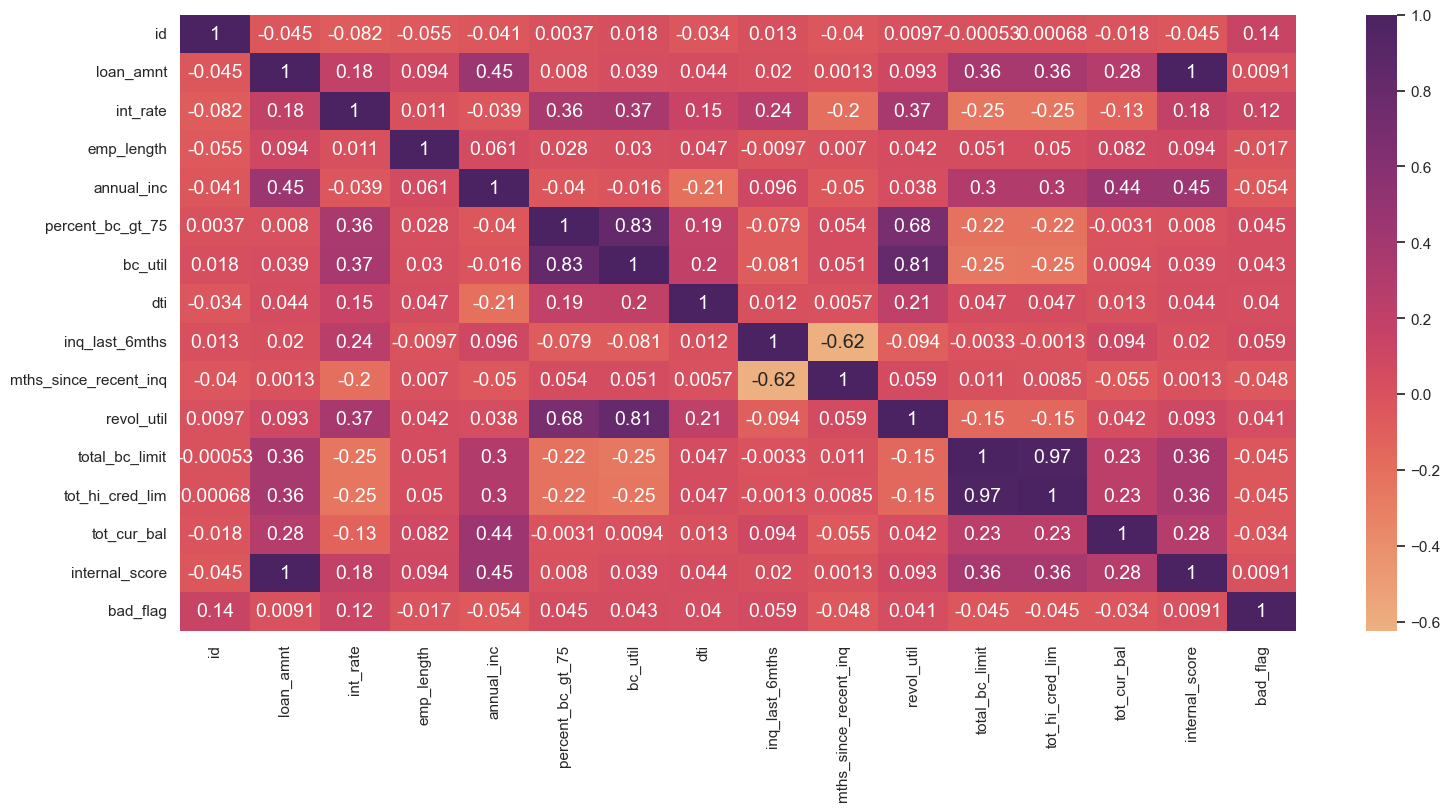

In [101]:
fig, ax = plt.subplots( figsize = (18,8) )
corr_matrix = numerical_df3.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

In [102]:
# Check the correlation of each feature with the target variable 'bad_flag'
target_corr = corr_matrix['bad_flag'].sort_values(ascending=False)
print(target_corr)


bad_flag                 1.000000
id                       0.140583
int_rate                 0.120711
inq_last_6mths           0.059158
percent_bc_gt_75         0.045105
bc_util                  0.043380
revol_util               0.041092
dti                      0.039641
loan_amnt                0.009112
internal_score           0.009109
emp_length              -0.017445
tot_cur_bal             -0.033591
tot_hi_cred_lim         -0.044798
total_bc_limit          -0.045185
mths_since_recent_inq   -0.048418
annual_inc              -0.054135
Name: bad_flag, dtype: float64


###Based on the correlation values with bad_flag, the features with the least importance (i.e., those that have the lowest correlation with bad_flag) can be removed.
These features have very low correlation values, indicating that they might not have a strong relationship with the target variable (bad_flag). These columns could potentially be less important for model training, especially if the goal is to reduce model complexity or improve interpretability. For now, we can proceed to a threshold calculation

In [103]:
# Set a threshold for correlation (e.g., 0.9)
threshold = 0.9

# Identify pairs of features with high correlation
high_corr_var = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_var.add(colname)

# Drop the highly correlated features from the dataframe
numerical_df3_reduced = numerical_df3.drop(columns=high_corr_var)

# Print the features that were dropped
print("Dropped Features due to High Correlation:")
print(high_corr_var)

# Display the reduced dataframe
print("Reduced DataFrame (without highly correlated features):")
print(numerical_df3_reduced.head())



Dropped Features due to High Correlation:
{'internal_score', 'tot_hi_cred_lim'}
Reduced DataFrame (without highly correlated features):
         id  loan_amnt  int_rate  emp_length  annual_inc  percent_bc_gt_75  \
0  10000001       7550    0.1624         3.0     28000.0             100.0   
1  10000002      27050    0.1099        10.0     55000.0              25.0   
2  10000003      12000    0.1099         4.0     60000.0               0.0   
3  10000004      28000    0.0762         5.0     62000.0              16.7   
4  10000005      12000    0.1353        10.0     40000.0              33.3   

   bc_util    dti  inq_last_6mths  mths_since_recent_inq  revol_util  \
0     96.0   8.40             0.0                   17.0       0.720   
1     53.9  22.87             0.0                    8.0       0.612   
2     15.9   4.62             1.0                    3.0       0.240   
3     67.1  18.55             1.0                    3.0       0.546   
4     79.6  16.94             0.0  

In [104]:
# Drop highly correlated features
df3_reduced = df_3.drop(columns=high_corr_var)

# Drop the 'application_approved_flag' column
df3_reduced = df3_reduced.drop(columns=['application_approved_flag'])

# Display the reduced dataframe
print("Reduced DataFrame (after dropping highly correlated features and 'application_approved_flag'):")
print(df3_reduced.head())


Reduced DataFrame (after dropping highly correlated features and 'application_approved_flag'):
         id  loan_amnt        term  int_rate  emp_length home_ownership  \
0  10000001       7550   36 months    0.1624         3.0           RENT   
1  10000002      27050   36 months    0.1099        10.0            OWN   
2  10000003      12000   36 months    0.1099         4.0           RENT   
3  10000004      28000   36 months    0.0762         5.0       MORTGAGE   
4  10000005      12000   36 months    0.1353        10.0           RENT   

   annual_inc             purpose  percent_bc_gt_75  bc_util    dti  \
0     28000.0  debt_consolidation             100.0     96.0   8.40   
1     55000.0  debt_consolidation              25.0     53.9  22.87   
2     60000.0  debt_consolidation               0.0     15.9   4.62   
3     62000.0  debt_consolidation              16.7     67.1  18.55   
4     40000.0  debt_consolidation              33.3     79.6  16.94   

   inq_last_6mths  mths_sin

In [105]:
df3_reduced.to_csv('training_processed_data.csv', index=False)


In [106]:
print(df3_reduced.columns)


Index(['id', 'loan_amnt', 'term', 'int_rate', 'emp_length', 'home_ownership',
       'annual_inc', 'purpose', 'percent_bc_gt_75', 'bc_util', 'dti',
       'inq_last_6mths', 'mths_since_recent_inq', 'revol_util',
       'total_bc_limit', 'tot_cur_bal', 'bad_flag'],
      dtype='object')


In [107]:
# File path to the dataset
file_path = (r'C:\Users\padhee.3\Downloads\Take Home Project\testing_loan_data.csv')

# Load the dataset
dft = pd.read_csv(file_path)

# Display the first few rows
dft.head(2)

C:\Users\padhee.3\AppData\Local\Temp\ipykernel_20900\2727297207.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  dft = pd.read_csv(file_path)


,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,20000001,22419852,10000,36 months,22.15%,8 years,RENT,37000.0,NaN,debt_consolidation,80.0,83.0,28.51,1,3.0,73.10%,16200,NaN,14877.17028,36809,1,131,NaN
1,20000002,22349118,1400,36 months,18.24%,6 years,RENT,41000.0,NaN,other,0.0,0.0,26.58,0,9.0,11.50%,4000,NaN,4097.30477,19536,1,19,NaN


In [108]:
# Clean 'years' column: Remove "years" and retain numbers
if 'emp_length' in dft.columns:  # Replace 'years' with the actual column name
    dft['emp_length'] = dft['emp_length'].str.extract(r'(\d+)').astype(float)

# Clean percentage columns: Remove '%' and convert to decimal
percentage_columns = ['int_rate', 'revol_util']  # Replace with actual percentage column names
for col in percentage_columns:
    if col in dft.columns:
        dft[col] = dft[col].str.replace('%', '', regex=True).astype(float) / 100

# Display cleaned dataset
print("Cleaned Columns:")
dft.head(2)

Cleaned Columns:


,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,20000001,22419852,10000,36 months,0.2215,8.0,RENT,37000.0,NaN,debt_consolidation,80.0,83.0,28.51,1,3.0,0.731,16200,NaN,14877.17028,36809,1,131,NaN
1,20000002,22349118,1400,36 months,0.1824,6.0,RENT,41000.0,NaN,other,0.0,0.0,26.58,0,9.0,0.115,4000,NaN,4097.30477,19536,1,19,NaN


In [109]:
df_selected = dft[df3_reduced.columns]

# Display the selected DataFrame
print(df_selected.head(2))

         id  loan_amnt        term  int_rate  emp_length home_ownership  \
0  20000001      10000   36 months    0.2215         8.0           RENT   
1  20000002       1400   36 months    0.1824         6.0           RENT   

   annual_inc             purpose  percent_bc_gt_75  bc_util    dti  \
0     37000.0  debt_consolidation              80.0     83.0  28.51   
1     41000.0               other               0.0      0.0  26.58   

   inq_last_6mths  mths_since_recent_inq  revol_util  total_bc_limit  \
0               1                    3.0       0.731           16200   
1               0                    9.0       0.115            4000   

   tot_cur_bal  bad_flag  
0        36809       NaN  
1        19536       NaN  


In [110]:
df3_reduced.isna().sum()


id                       0
loan_amnt                0
term                     0
int_rate                 0
emp_length               0
home_ownership           0
annual_inc               0
purpose                  0
percent_bc_gt_75         0
bc_util                  0
dti                      0
inq_last_6mths           0
mths_since_recent_inq    0
revol_util               0
total_bc_limit           0
tot_cur_bal              0
bad_flag                 0
dtype: int64

In [57]:
df3_reduced.to_csv('testing_processed_data.csv', index=False)


In this code, I have cleaned the training and testing data, selected the features from training data in testing data for same number of columns.